# Trading Algorithm. CORRELATION (Ejemplo base)
## Pairs Trading

Pairs trading is a strategy that uses two stocks that are highly correlated. We can then use the difference in price between the two stocks as signal if one moves out of correlation with the other. It is an older strategy that is used classically as a guide to beginning algorithmic trading. There is a fantastic full guide and write up on Investopedia you can find [here](http://www.investopedia.com/university/guide-pairs-trading/)! **I highly recommend reading the article in full before continuing, it is entertaining and informative!**


Let's create our first basic trading algorithm! This is an exercise in using quantopian, **NOT** a realistic representation of what a good algorithm is! Never use something as simple as this in the real world! This is an extremely simplified version of Pairs Trading, we won't be considering factors such as cointegration!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import quandl
import yfinance as yf
import datetime as dt

In [2]:
#funcion que calcula un tipo de normalizacion (entiedo que hay muchos tipos, lo estudiaremos)
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

## Instrumentos a correlar y rango de fechas

In [3]:
activo1 = 'san'  #'ual'
activo2 = 'bbva' #'aal'

start   =dt.datetime(2008,11,18)
end   =dt.datetime(2022,8,1)

In [4]:
#serie1 = quandl.get('WIKI/UAL',start_date=start,end_date=end)
#serie2 = quandl.get('WIKI/AAL',start_date=start,end_date=end)

serie1 = yf.download(activo1, start,end)
serie2 = yf.download(activo2, start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
serie1.info()
serie2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3448 entries, 2008-11-17 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3448 non-null   float64
 1   High       3448 non-null   float64
 2   Low        3448 non-null   float64
 3   Close      3448 non-null   float64
 4   Adj Close  3448 non-null   float64
 5   Volume     3448 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3448 entries, 2008-11-17 to 2022-07-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3448 non-null   float64
 1   High       3448 non-null   float64
 2   Low        3448 non-null   float64
 3   Close      3448 non-null   float64
 4   Adj Close  3448 non-null   float64
 5   Volume     3448 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.6 KB


In [6]:
serie1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-11-17,8.03,8.33,7.90,7.98,3.307876,3593700
2008-11-18,8.00,8.08,7.63,8.01,3.320312,4094400
2008-11-19,7.70,7.70,6.77,6.80,2.818741,5039000
2008-11-20,6.36,6.72,6.01,6.06,2.511995,11034400
2008-11-21,6.27,6.99,6.27,6.81,2.822886,4238900


In [7]:
serie2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-11-17,9.783978,10.045271,9.590427,9.638815,4.855580,436165
2008-11-18,9.532362,9.735590,9.261392,9.580750,4.826331,360526
2008-11-19,9.532362,9.629138,8.709773,8.738805,4.402198,651613
2008-11-20,8.738805,8.990421,8.109766,8.177509,4.119442,1111648
2008-11-21,8.951711,8.951711,8.187186,8.787193,4.426574,2226602


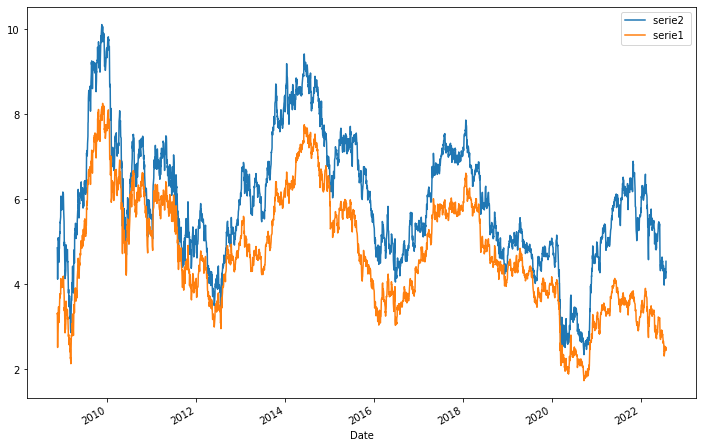

In [8]:
serie2['Adj Close'].plot(label='serie2 ',figsize=(12,8))
serie1['Adj Close'].plot(label='serie1 ')
plt.legend()

## Spread and Correlation
Coeficiente de correlación producto-momento de Pearson
En las estadísticas, el coeficiente de correlación producto-momento de Pearson es una medida de la correlación lineal entre dos variables X e Y, dando un valor entre +1 y -1 inclusive, donde 1 es correlación positiva total, 0 es ninguna correlación y -1 Es la correlación negativa total.

https://es.wikipedia.org/wiki/Correlaci%C3%B3n

In [9]:
serie2['Adj Close']

Date
2008-11-17    4.855580
2008-11-18    4.826331
2008-11-19    4.402198
2008-11-20    4.119442
2008-11-21    4.426574
                ...   
2022-07-25    4.300000
2022-07-26    4.140000
2022-07-27    4.290000
2022-07-28    4.280000
2022-07-29    4.540000
Name: Adj Close, Length: 3448, dtype: float64

In [10]:
serie2_Norm= zscore(serie2['Adj Close'])

In [11]:
serie1_Norm= zscore(serie1['Adj Close'])

Text(0.5, 1.0, ' Valores Normalizados')

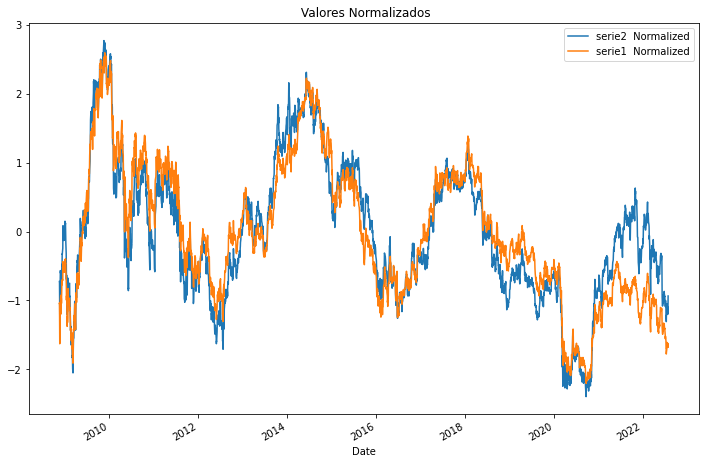

In [12]:
serie2_Norm.plot(label='serie2  Normalized',figsize=(12,8))
serie1_Norm.plot(label='serie1  Normalized')
plt.legend()
plt.title(' Valores Normalizados')

In [13]:
np.corrcoef(serie2['Adj Close'],serie1['Adj Close'])

array([[1.        , 0.92592358],
       [0.92592358, 1.        ]])

El Coeficiente nos calcula la relacion entre las series de datos y nos ofrece una matriz de resultados de correlaciones. En este caso columnas AA - UA y filas AA -UA
La diagonal nos ofrece un dato =1, al compara la serie con ella misma, las otras celdas muestran las realciones entre las distintas series.

In [14]:
array = np.corrcoef(serie2_Norm,serie1_Norm)
#array[0][0]

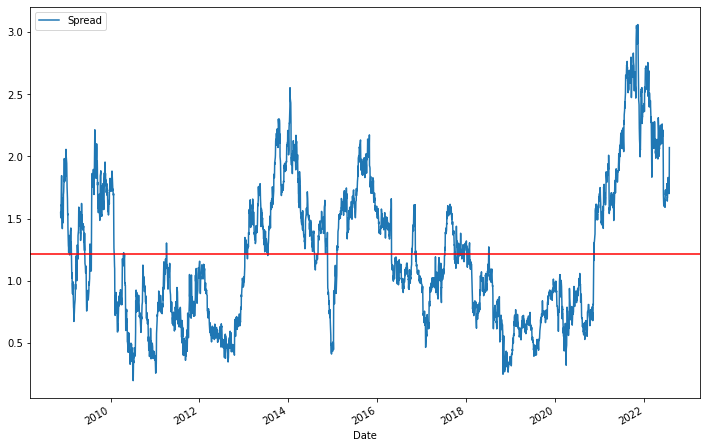

In [15]:
spread = serie2['Adj Close'] - serie1['Adj Close']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend()

Text(0.2, 0.9, 'Correlacion:')

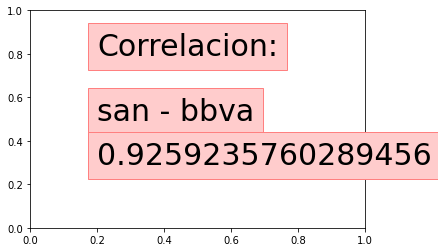

In [16]:
texto= array[0][1] # +activo1+activo2
plt.text(0.2, 0.6, activo1 + ' - '+ activo2 , size=30, rotation=0.,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(0.2, 0.4, texto , size=30, rotation=0.,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
plt.text(0.2, 0.9, "Correlacion:" , size=30, rotation=0.,
         ha="left", va="top",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

Text(0.5, 1.0, 'SPREAD NORMALIZADO')

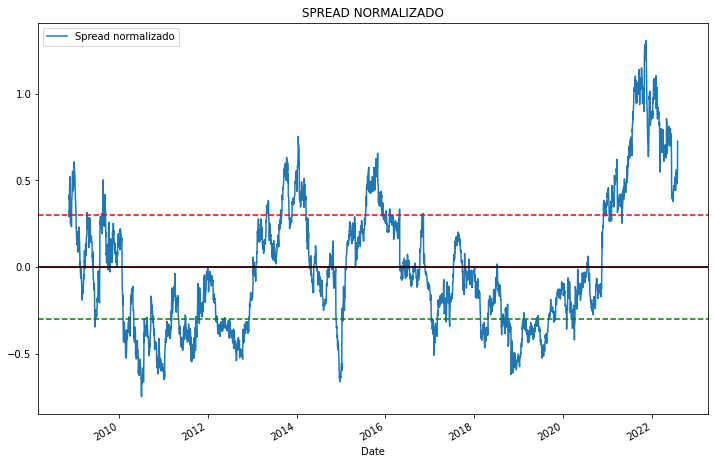

In [17]:
spread_nor = serie2_Norm - serie1_Norm
spread_nor.plot(label='Spread normalizado',figsize=(12,8))
plt.axhline(spread_nor.mean(),c='r')
plt.axhline(zscore(spread).mean(), color='black')

plt.axhline(0.3, c='r', ls='--')
plt.axhline(-0.3, c='g', ls='--')
plt.legend()
plt.title('SPREAD NORMALIZADO')


Por Spread entendemos la diferencia entre los valores...

### Normalizing with a z-score

def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

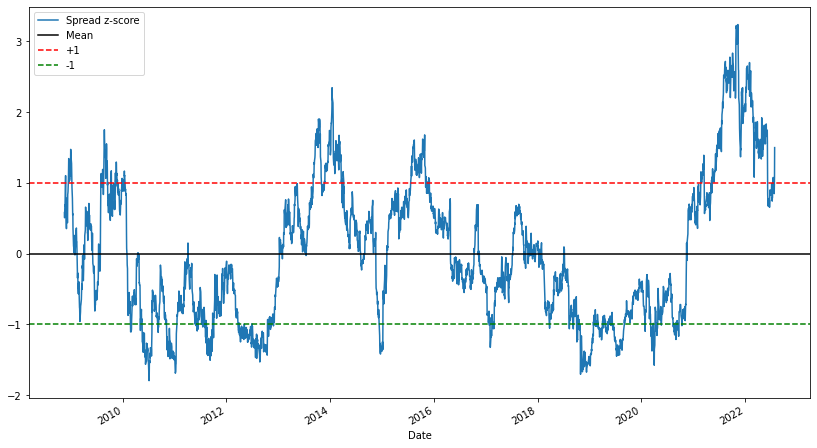

In [18]:
zscore(spread).plot(figsize=(14,8))

plt.axhline(zscore(spread).mean(), color='black')

plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

### Rolling Z-Score

Our spread is currently serie2-serie1. Let's decide how to calculate this on a rolling basis for our use in Quantopian

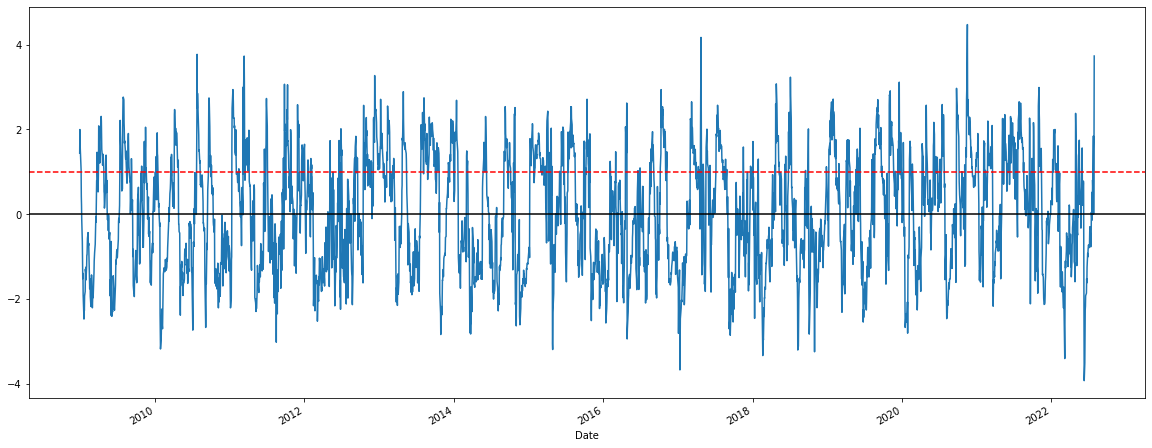

In [19]:
#1 day moving average of the price spread
spread_mavg1 = spread.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30 = spread.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30 = spread.rolling(30).std()

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30



zscore_30_1.plot(figsize=(20,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--');

## Implementation of Strategy

#### WARNING: YOU SHOULD NOT ACTUALLY TRADE WITH THIS!

In [20]:
import numpy as np
 
def initialize(context):
    """
    Called once at the start of the algorithm.
    """   
    
    # Every day we check the pair status
    schedule_function(check_pairs, date_rules.every_day(), time_rules.market_close(minutes=60))
    
    # Our Two Airlines
    context.aa = sid(45971) #aal
    context.ual = sid(28051) #ual   
    
    # Flags to tell us if we're currently in a trade
    context.long_on_spread = False
    context.shorting_spread = False


def check_pairs(context, data):
    
    # For convenience
    aa = context.aa
    ual = context.ual
    
    # Get pricing history
    prices = data.history([aa, ual], "price", 30, '1d')
    
 
    # Need to use .iloc[-1:] to get dataframe instead of series
    short_prices = prices.iloc[-1:]
    
    # Get the long 30 day mavg
    mavg_30 = np.mean(prices[aa] - prices[ual])
    
    # Get the std of the 30 day long window
    std_30 = np.std(prices[aa] - prices[ual])
    
    # Get the shorter span 1 day mavg
    mavg_1 = np.mean(short_prices[aa] - short_prices[ual])
    
    # Compute z-score
    if std_30 > 0:
        zscore = (mavg_1 - mavg_30)/std_30
    
        # Our two entry cases
        if zscore > 0.5 and not context.shorting_spread:
            # spread = aa - ual
            order_target_percent(aa, -0.5) # short top
            order_target_percent(ual, 0.5) # long bottom
            context.shorting_spread = True
            context.long_on_spread = False
            
        elif zscore < -0.5 and not context.long_on_spread:
            # spread = aa - ual
            order_target_percent(aa, 0.5) # long top
            order_target_percent(ual, -0.5) # short bottom
            context.shorting_spread = False
            context.long_on_spread = True
            
        # Our exit case
        elif abs(zscore) < 0.1:
            order_target_percent(aa, 0)
            order_target_percent(ual, 0)
            context.shorting_spread = False
            context.long_on_spread = False
        
        record('zscore', zscore)